In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
df.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [8]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
df.shape

(39644, 61)

In [10]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [11]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [12]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dropna(axis=1)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [15]:
#Outliers

numerical_columns=df.select_dtypes(include=['number'])

In [16]:
numerical_columns

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


<Axes: >

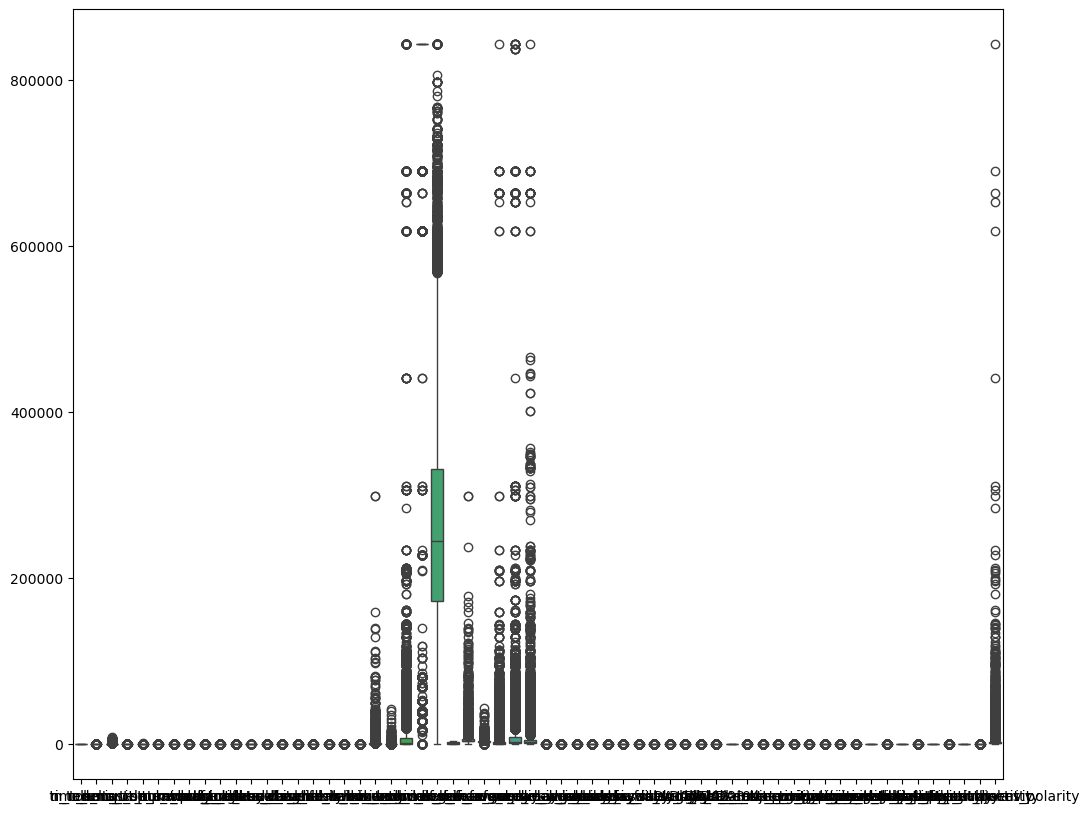

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(data)

In [18]:
def outliers(df):
    for col in df.select_dtypes(include=['float64','int64']).columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_bound=Q1-(1.5*IQR)
        Upper_bound=Q3+(1.5*IQR)


        df[col]=df[col].apply(lambda x:Lower_bound if x<Lower_bound else Upper_bound if x > Upper_bound else x)

    return df 

In [19]:
df1=outliers(df)

<Axes: >

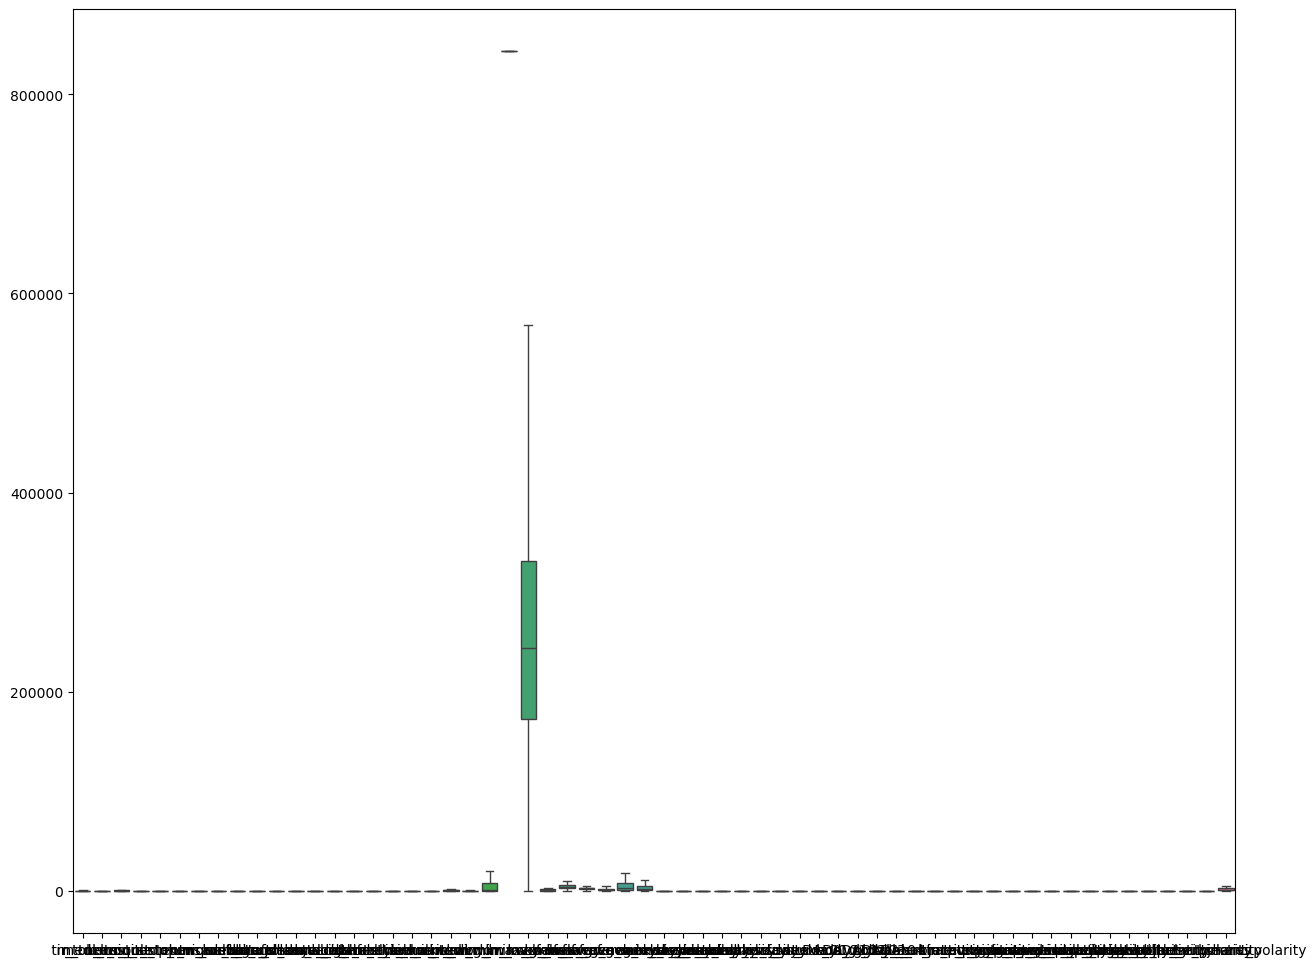

In [20]:
plt.figure(figsize=(15,12))
sns.boxplot(df1)

In [21]:
df1=df1.drop(columns=['url'])

In [22]:
df1.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,8.5,8.5,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [23]:
pt=PowerTransformer(method='yeo-johnson')

In [24]:
numerical_features=df1.select_dtypes(include=['float64','int64']).columns

In [25]:
df1[numerical_features]=pt.fit_transform(df1[numerical_features])

BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [26]:
df1[numerical_features].skew()

timedelta                        0.120504
n_tokens_title                   0.136293
n_tokens_content                 0.983430
n_unique_tokens                 -0.151793
n_non_stop_words                 0.000000
n_non_stop_unique_tokens        -0.284937
num_hrefs                        1.095150
num_self_hrefs                   0.817203
num_imgs                         1.089328
num_videos                       1.303549
average_token_length            -0.125864
num_keywords                    -0.138796
data_channel_is_lifestyle        0.000000
data_channel_is_entertainment    0.000000
data_channel_is_bus              0.000000
data_channel_is_socmed           0.000000
data_channel_is_tech             0.000000
data_channel_is_world            0.000000
kw_min_min                       1.261410
kw_max_min                       0.783821
kw_avg_min                       0.801512
kw_min_max                       1.197249
kw_max_max                       0.000000
kw_avg_max                       0

In [28]:
df2=df1[numerical_features]

In [30]:
correlation=df2.corr()
correlation

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240511,-0.071677,0.185444,-0.058914,0.162944,0.006225,0.054871,-0.065857,-0.113185,...,0.069798,0.098288,0.000013,0.062175,-0.078181,-0.015919,0.040506,0.011551,-0.003452,0.030760
n_tokens_title,-0.240511,1.000000,0.013099,-0.043285,0.004242,-0.032750,-0.060418,0.008974,-0.024270,0.104124,...,-0.008393,-0.021969,-0.019437,-0.029130,0.012721,0.077242,0.012936,-0.147044,0.052412,-0.029364
n_tokens_content,-0.071677,0.013099,1.000000,-0.607885,0.808889,-0.462322,0.458565,0.273215,0.295300,0.029072,...,-0.306366,0.468616,-0.180180,-0.496784,0.265855,-0.001568,0.010093,0.012917,0.008699,0.015086
n_unique_tokens,0.185444,-0.043285,-0.607885,1.000000,-0.512913,0.906946,-0.211615,-0.078050,-0.295235,0.047855,...,0.464945,-0.014938,-0.126406,0.153575,-0.378397,0.002624,-0.024668,-0.012172,-0.011069,-0.035034
n_non_stop_words,-0.058914,0.004242,0.808889,-0.512913,1.000000,-0.401149,0.481131,0.260364,0.291558,-0.017662,...,-0.232349,0.519788,-0.265734,-0.507125,0.154978,-0.024744,0.007683,0.035091,-0.009165,-0.017310
n_non_stop_unique_tokens,0.162944,-0.032750,-0.462322,0.906946,-0.401149,1.000000,-0.273158,-0.097036,-0.413427,0.038238,...,0.356480,0.032855,-0.127293,0.073271,-0.286295,-0.023226,-0.043463,0.001376,-0.035555,-0.057994
num_hrefs,0.006225,-0.060418,0.458565,-0.211615,0.481131,-0.273158,1.000000,0.350339,0.382958,0.030796,...,-0.084076,0.343953,-0.203549,-0.306100,0.041098,0.046263,0.039624,0.007502,0.062467,0.103244
num_self_hrefs,0.054871,0.008974,0.273215,-0.078050,0.260364,-0.097036,0.350339,1.000000,0.214892,0.076903,...,-0.045954,0.210310,-0.094034,-0.126541,-0.004704,-0.019890,0.020374,0.013029,-0.014513,0.017866
num_imgs,-0.065857,-0.024270,0.295300,-0.295235,0.291558,-0.413427,0.382958,0.214892,1.000000,-0.081589,...,-0.017414,0.195293,-0.105172,-0.165249,0.043456,0.069984,0.054467,-0.014825,0.078360,0.112764
num_videos,-0.113185,0.104124,0.029072,0.047855,-0.017662,0.038238,0.030796,0.076903,-0.081589,1.000000,...,0.012787,0.050907,-0.095233,-0.092318,0.008773,0.068546,0.013867,-0.017745,0.057985,0.058826


<Axes: >

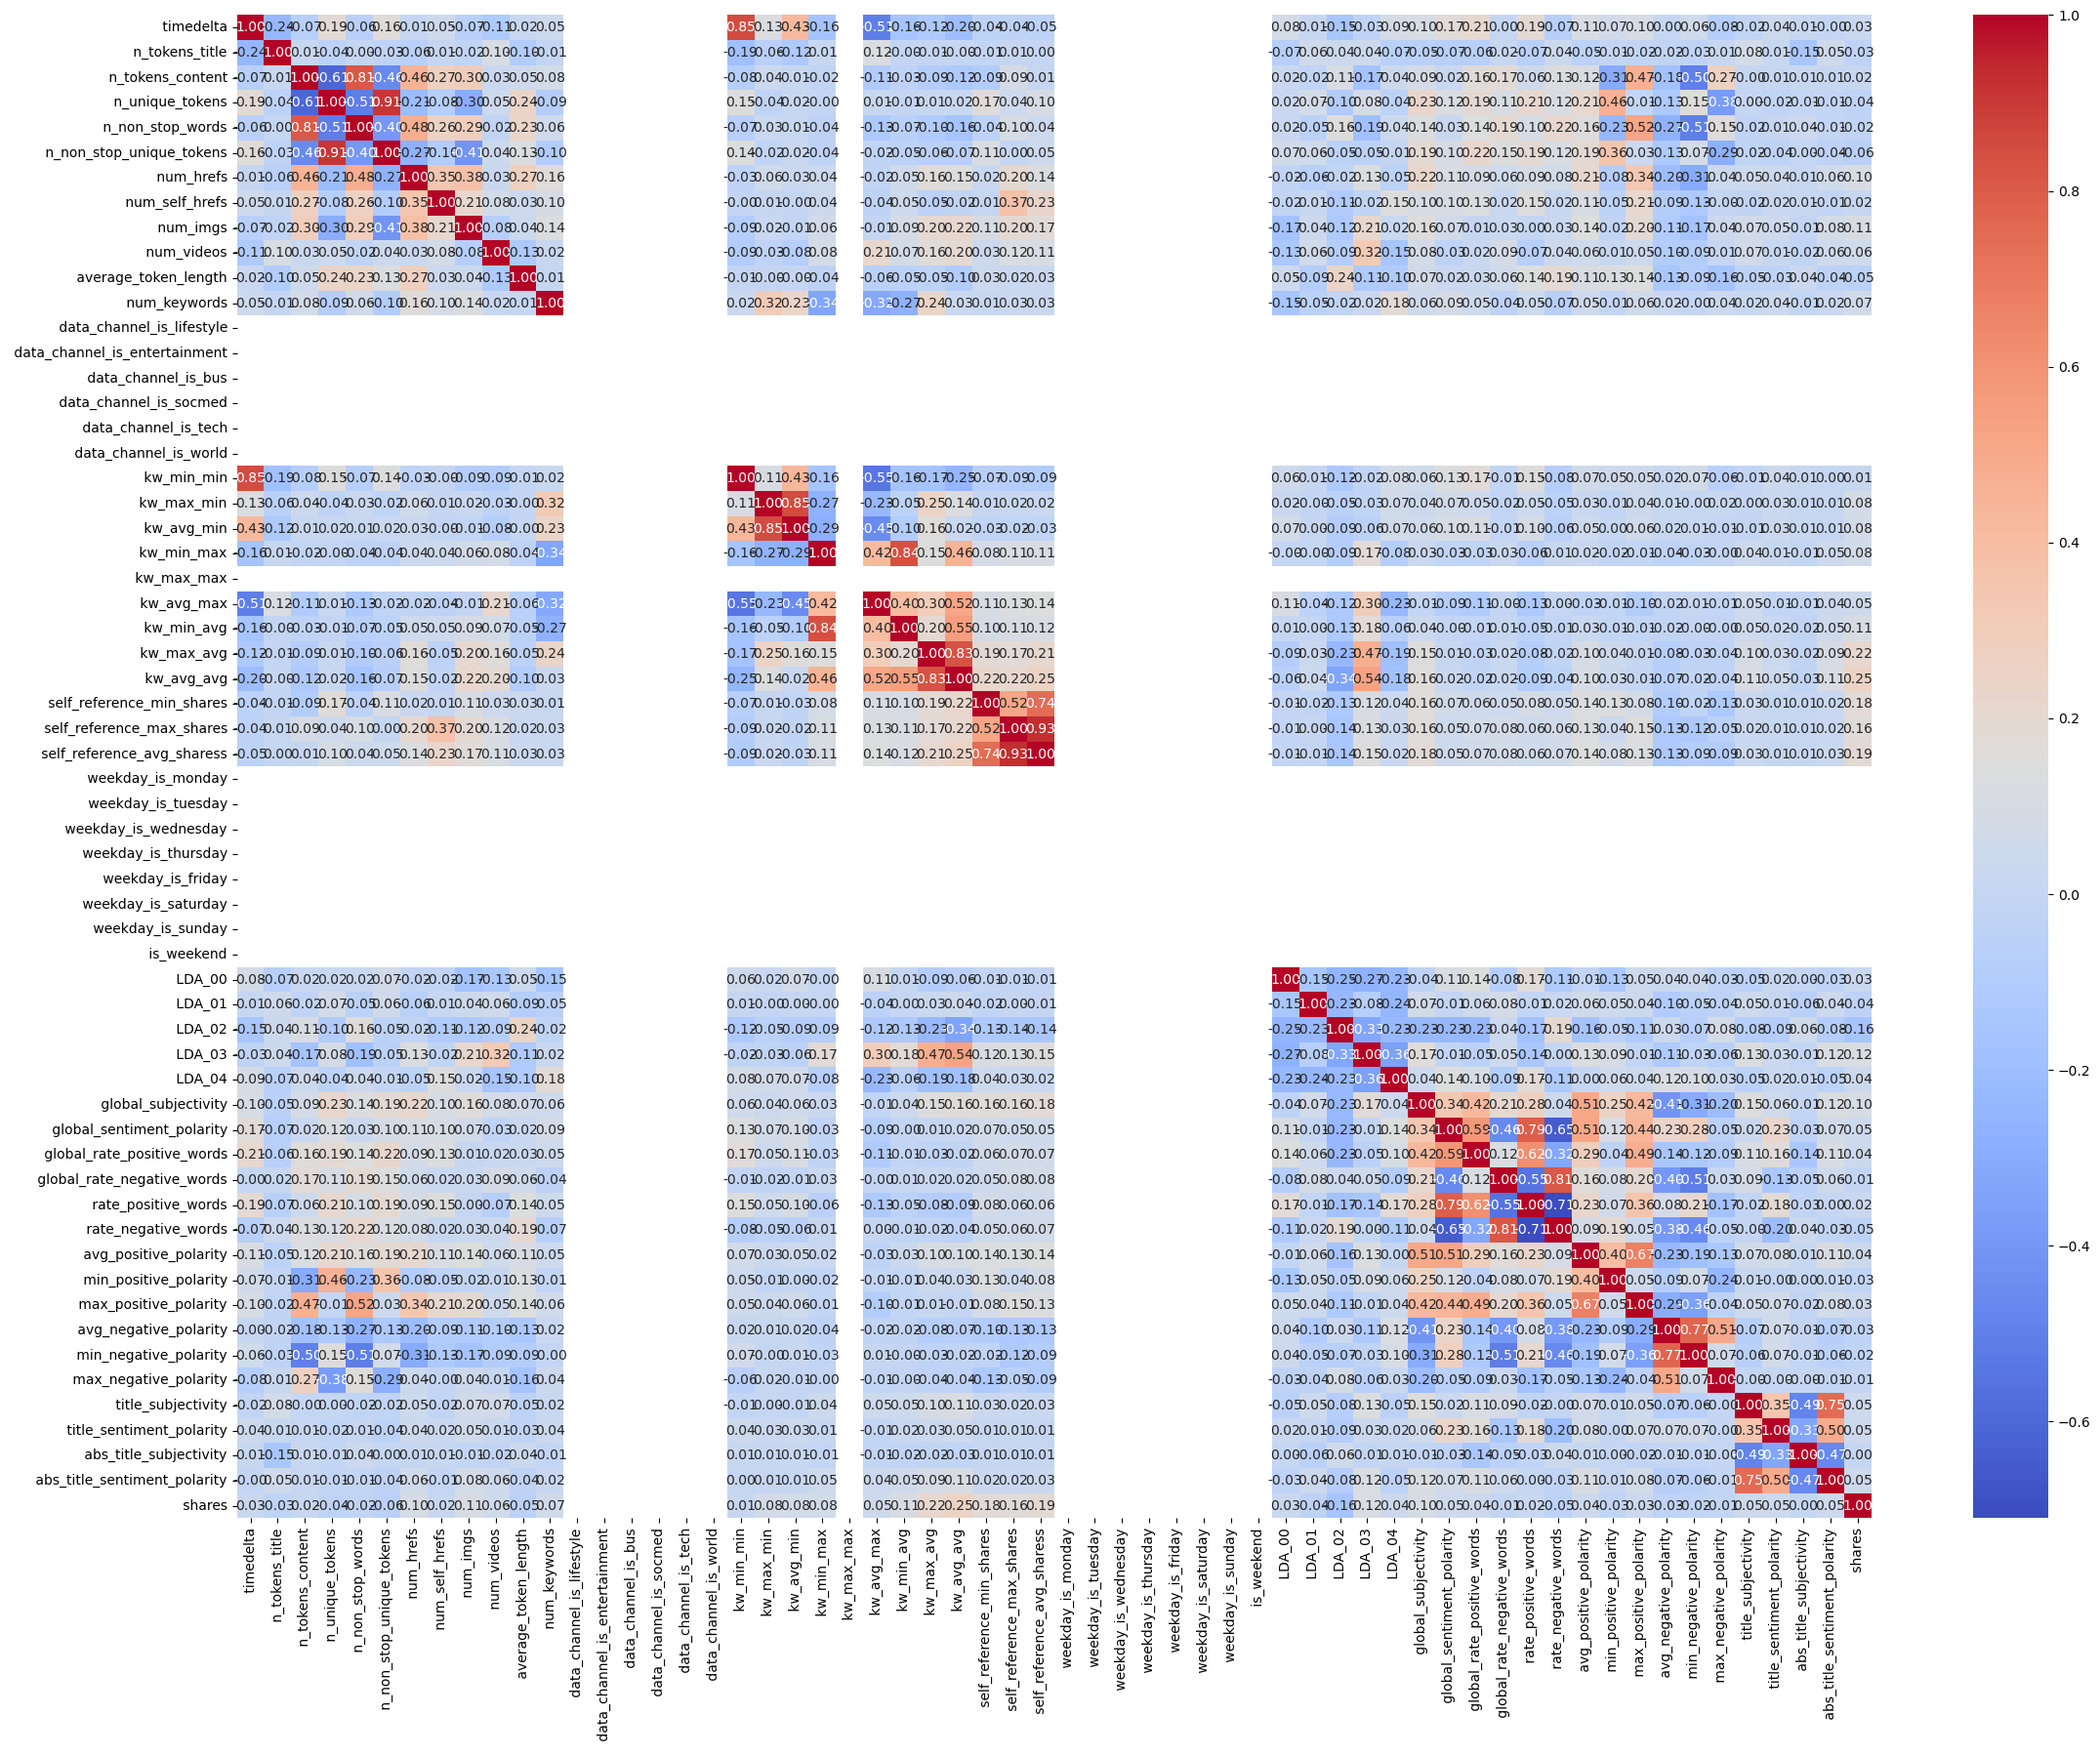

In [32]:
plt.figure(figsize=(27,20))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')

In [33]:
x=df1.drop( ' shares',axis=1)
y=df1[ ' shares']


In [34]:
sk=SelectKBest(score_func=f_classif,k=20)
x_num=sk.fit_transform(x,y)

In [38]:
selected_features=x.columns[sk.get_support()]
feature_scores=pd.DataFrame({'feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending=False)

print("selected features:",selected_features)
print("\nfeature scores:")
print(feature_scores)

selected features: Index([' timedelta', ' n_non_stop_words', ' num_hrefs', ' num_imgs',
       ' num_keywords', ' kw_max_min', ' kw_avg_min', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_01',
       ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' rate_negative_words'],
      dtype='object')

feature scores:
                           feature     score
4                 n_non_stop_words  7.166482
26                      kw_avg_avg  4.052390
25                      kw_max_avg  3.093989
40                          LDA_02  2.728063
29      self_reference_avg_sharess  2.588136
27       self_reference_min_shares  2.402586
28       self_reference_max_shares  2.152478
41                          LDA_03  1.748324
42                          LDA_04  1.503905
20                      kw_avg_min  1.448583
6                        num_hrefs  1

In [ ]:
x_selected=x[selected_features]

In [ ]:
x_selected.columns

In [ ]:
scaler=StandardScaler()

In [ ]:
x_scaled=scaler.fit_transform(x_selected)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
print(f"""
x train shape:{x_train.shape}
x test shape:{x_test.shape}
y train shape:{y_train.shape}
y test shape:{y_test.shape}
""")